In [1]:
# Perceptron Learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

np.random.seed(3)

X = np.ones((20, 3))
X[:, 1:] = np.random.rand(20, 2)
X    # Test data (X)

array([[1.        , 0.5507979 , 0.70814782],
       [1.        , 0.29090474, 0.51082761],
       [1.        , 0.89294695, 0.89629309],
       [1.        , 0.12558531, 0.20724288],
       [1.        , 0.0514672 , 0.44080984],
       [1.        , 0.02987621, 0.45683322],
       [1.        , 0.64914405, 0.27848728],
       [1.        , 0.6762549 , 0.59086282],
       [1.        , 0.02398188, 0.55885409],
       [1.        , 0.25925245, 0.4151012 ],
       [1.        , 0.28352508, 0.69313792],
       [1.        , 0.44045372, 0.15686774],
       [1.        , 0.54464902, 0.78031476],
       [1.        , 0.30636353, 0.22195788],
       [1.        , 0.38797126, 0.93638365],
       [1.        , 0.97599542, 0.67238368],
       [1.        , 0.90283411, 0.84575087],
       [1.        , 0.37799404, 0.09221701],
       [1.        , 0.6534109 , 0.55784076],
       [1.        , 0.36156476, 0.2250545 ]])

In [3]:
line = lambda x: 0.7 - 0.8*x        # Decision boundary
f = lambda x1, x2: x2 > line(x1)    # Ideal function

y = -1 + 2*f(X[:, 1], X[:, 2])      # Test data (y)
y

array([ 1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1, -1])

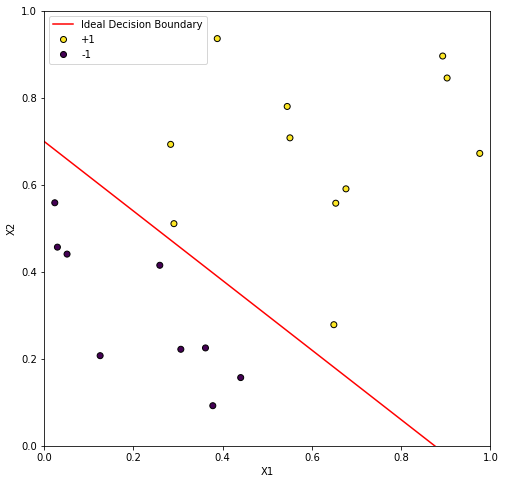

In [4]:
# Visualisation

X1, X2 = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
bias = np.ones(200)
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 1, 0, 1])
plt.plot(np.linspace(0, 1), line(np.linspace(0, 1)), 'r')
plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors="black")
plt.legend((
    plt.Line2D((0, 1), (0, 0), color='r'),
    plt.Line2D((0, 1), (0, 0), marker='o', color=mpl.cm.get_cmap()(1.), markeredgecolor='black', linestyle=''),
    plt.Line2D((0, 1), (0, 0), marker='o', color=mpl.cm.get_cmap()(0.), markeredgecolor='black', linestyle='')), 
    ("Ideal Decision Boundary", "+1", "-1"))
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [5]:
# Initial guessing

w = np.random.rand(3)
h = lambda X: np.sign(X @ w)
print(w)
print(h(X))

[0.40651992 0.46894025 0.26923558]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


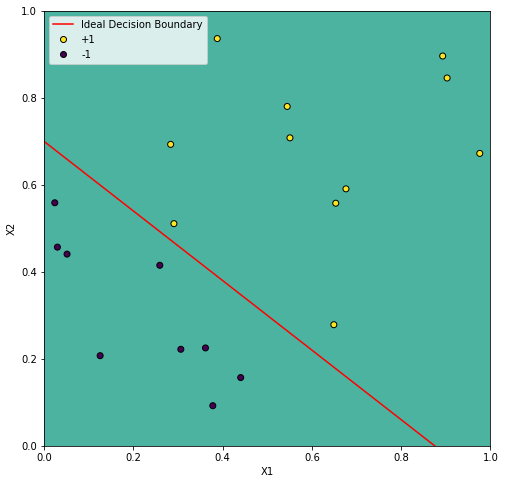

In [6]:
def visualize():
    fig = plt.figure(figsize=(8, 8))
    plt.axis([0, 1, 0, 1])

    H = np.zeros((200, 200))
    x2 = X2[:, 1].reshape(-1, 1)
    x0 = np.ones_like(x2)
    for i, x1 in enumerate(X1[1]):
        x = np.r_['1, 2', x0, np.full_like(x2, x1), x2]
        H[:, i] = h(x)

    plt.contourf(X1, X2, H, alpha=0.8)

    plt.plot(np.linspace(0, 1), line(np.linspace(0, 1)), 'r')
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors="black")
    plt.legend((
        plt.Line2D((0, 1), (0, 0), color='r'),
        plt.Line2D((0, 1), (0, 0), marker='o', color=mpl.cm.get_cmap()(1.), markeredgecolor='black', linestyle=''),
        plt.Line2D((0, 1), (0, 0), marker='o', color=mpl.cm.get_cmap()(0.), markeredgecolor='black', linestyle='')), 
        ("Ideal Decision Boundary", "+1", "-1"))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

visualize()

[-0.59348008  0.34335494  0.0619927 ]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]


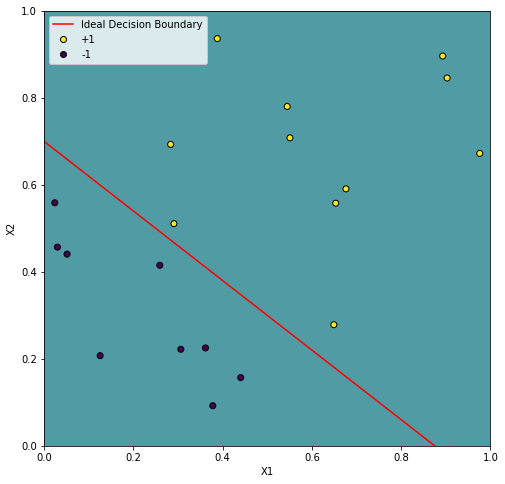

In [7]:
# Update weights (1st iteration)
w += X[h(X) != y][0] * y[h(X) != y][0]
print(w)
print(h(X))
visualize()

In [8]:
%%capture

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8, 8))

def draw(t):
    global w
    if (h(X) != y).any():
        w += X[h(X) != y][0] * y[h(X) != y][0]
        H = np.zeros((200, 200))
        x2 = X2[:, 1].reshape(-1, 1)
        x0 = np.ones_like(x2)
        for i, x1 in enumerate(X1[1]):
            x = np.r_['1, 2', x0, np.full_like(x2, x1), x2]
            H[:, i] = h(x)
        ax.clear()
        ax.set_ylim(0, 1)
        ax.set_xlim(0, 1)
        ax.contourf(X1, X2, H, alpha=0.8)
        ax.plot(np.linspace(0, 1), line(np.linspace(0, 1)), 'r')
        ax.scatter(X[:, 1], X[:, 2], c=y, edgecolors="black")
        ax.legend((
            plt.Line2D((0, 1), (0, 0), color='r'),
            plt.Line2D((0, 1), (0, 0), marker='o', color=mpl.cm.get_cmap()(1.), markeredgecolor='black', linestyle=''),
            plt.Line2D((0, 1), (0, 0), marker='o', color=mpl.cm.get_cmap()(0.), markeredgecolor='black', linestyle='')), 
            ("Ideal Decision Boundary", "+1", "-1"))
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
    ax.set_title(f"Iteration {t + 2}")
    return tuple()

anim = FuncAnimation(fig, draw, 15, interval=1000, blit=False)

In [9]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [10]:
# Final weights
print(w)

[-1.59348008  2.45663268  1.97608729]
